# Lab 4: Clustering (Part 1)
**(Part 1 of 3)**       
By **Jackie Kazil** | Lab Assignment 4 | CSS 739, Spring 2015 | GeoSocial Analysis   
           
For this lab on clustering, I took an exploratory approach to learn more about various clustering methods. Included in this lab are a series of IPython notebooks, which walk through the process. Each of the notebooks highlight one of the approaches tried.

### Question 1: Overview and approach
The data explored in this lab is data from the 2012 London Olympic games. I originally started the assignment exploring wtih PySAL, but failed at finding any good documentation. After spending the whole weekend determined to make PySAL work, I moved to the [scikit-learn Python library](http://scikit-learn.org/stable/index.html).

The analysis of these explorations are divided into three IPython Notebooks - one notebook for each clustering method that is applied. The reason for the division of the content is because some of the actions that were occuring within the notebooks were computationally intensive.

When applying each of the methods, I started with a general application, then tried different variations to see what I could get from the data based upon the application. While not completely visible in the notebooks, I played around with different variations as to which data components to use with each of the clustering methods to see if I could garner results that could tell me something about the dataset. Some clustering methods seemed to be more successful than others. Only the approaches that seemed to have interesting information were saved to the notebook - these were most often based on latitudinal and longitudinal clustering, although there is some experimentation based on date and time, along with sentiment.

### Question 2: How each clustering works 
The three appraoches that were used are **K-means**, Agglomerative, and Affinity Propagation.

To interact the data in this notebook, visit the interactive version of each of the notebooks.
* [Lab 4: Clustering (Part 1)](http://nbviewer.ipython.org/github/jackiekazil/assignments/blob/master/css/geosocial/lab4-clustering/Lab%204%20-%20Clustering.ipynb) - K-means
* [Lab 4: Clustering (Part 2)](http://nbviewer.ipython.org/github/jackiekazil/assignments/blob/master/css/geosocial/lab4-clustering/Lab%204%20-%20Clustering-Part%202.ipynb) - Agglomerative
* [Lab 4: Clustering (Part 3)](http://nbviewer.ipython.org/github/jackiekazil/assignments/blob/master/css/geosocial/lab4-clustering/Lab%204%20-%20Clustering-Part%203.ipynb) - Affinity Progation

#### K-means clustering

The first notebook (this one), explored k-means clustering. K-means is a general approach that we covered in class. K-means requires a number of clusters to be identified. The algorithm takes the number of clusters and randomly places what would be designated as the center. Then it divides the space by creating clusters according to the distance to the other centers. Each center is then updated to reflect the mean of all of the points in the cluster, which causes the cluster's boundaries to change in the following iteration. This is because the points are divided into clusters according to their new locations.

Let's see this in action. To start the process, first we load the data from the CSV file into a dataframe.

In [1]:
import matplotlib
%matplotlib inline

import pandas as pd
df = pd.read_csv('Olympic_torch_2012_UK.csv')

To explore the dataset, the first approach I took was to create a general visualization.

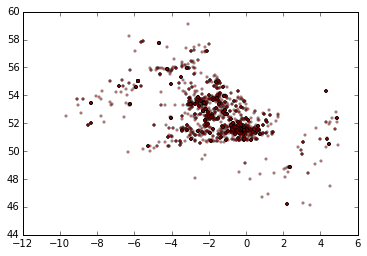

In [2]:
import matplotlib.pyplot as plt

plt.hold(True)
df_scatter = plt.scatter(x=df['longitude'], y=df['latitude'], c='red', alpha=.4, s=5)

After the initial visualization, I tried using k-means clustering according to the location of the object. Since k-means clusterings requires the number of clusters to be defined, I first created a simple example using five clusters, but then I abstracted that to generate a function that would take a value from a sliding scale.

##### Settting up the function to apply agglomerative clustering



In [3]:
from sklearn.cluster import KMeans

df = df
def graph_kmeans(clusters, lookup_keys=['latitude','longitude']):
    k_means = KMeans(clusters)  # number of clusters
    output = k_means.fit(df[lookup_keys]).labels_
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.scatter(df['longitude'], df['latitude'], c=output)
    return fig

Use the slider on the graph below to adjust the number of k-means clusters.

In [4]:
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

StaticInteract(graph_kmeans,
               clusters = RangeWidget(1, 15, 1),
              )

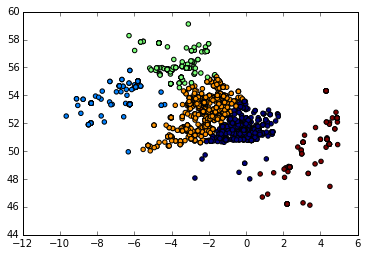

In [5]:
k_means = KMeans(5)  # number of clusters
output = k_means.fit(df[['longitude', 'latitude']]).labels_
df_scatter = plt.scatter(df['longitude'], df['latitude'], c=output)

In [6]:
import mplleaflet
mplleaflet.display(fig=df_scatter.figure)

### Question 3: Results and evaluation of all the methods

Just as reminder, the approaches that were used while I completed the assignment were k-means, agglomerative, and affinity propagation. 

##### Defining the number of clusters:
All three of these approaches has their positives and their negatives. K-means and agglomerative required a specific number of cluster outputs to be defined. The problem with this is that I didn't know where to start, which is why I added the slider bar. The affinity propagation was a little more flexible because you don't need to add the number of clusters. The affinity propagation approach will calculate that for you. However, it is not necessarily helpful. When doing this, the approach calculated >700 on the dataset, which means that each cluster had an average of six points in it. That is not necessarily helpful -- I am wondering if DBSCAN would have garnered more guidance in this direction.

##### Performance and approach comparison:
**Run time**: By far the slowest approach was agglomerative clustering method. My hypothesis is that this is because the clustering method is from the bottom up. After timing all of the methods, k-means appeared to be the fastest of all. 

**Meaningful results:** In all of the experiments, the most interesting results were generated by clustering latitude and longitude points. As a result, I am going to focus on this for the review. Interestingly, if you set the k-means slider above to eight clusters and you do the same for agglomerative clustering, you can see the significant differences between the two approaches. K-means divides clusters more evenly, where using agglomerative method better identifies a dominate cluster. With a basic understanding of population distribution in the UK, it is my guess that this dominating cluster holds the majority of the population. It would be interesting to compare this further. 

         K-means - 8 clusters                         Agglomerative - 8 clusters

<img src="kmeans-8clusters.png" width=300px align=left> 
<img src="agglo-8clusters.png" width=300px>

For further exploration, please explore each of the IPython notebooks.